In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
# โหลดข้อมูล
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data = pd.read_csv(url, names=columns, na_values="?")

In [3]:
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# จัดการค่าที่หายไป
data = data.dropna()

In [6]:
# แปลง Column เป้าหมายให้เป็น Binary (0 = ไม่เป็นโรคหัวใจ, 1 = เป็นโรคหัวใจ)
data["num"] = (data["num"] > 0).astype(int)

In [7]:
# แยก Feature และ target
X = data.drop("num", axis=1)
y = data["num"]

In [8]:
# แบ่งข้อมูลเป็นชุดฝึกสอนและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
# สร้างและฝึกสอน Model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [10]:
# ทำนายผลลัพธ์
y_pred = rf_classifier.predict(X_test)

In [11]:
# ประเมินประสิทธิภาพของ Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.81      0.81      0.81        27

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



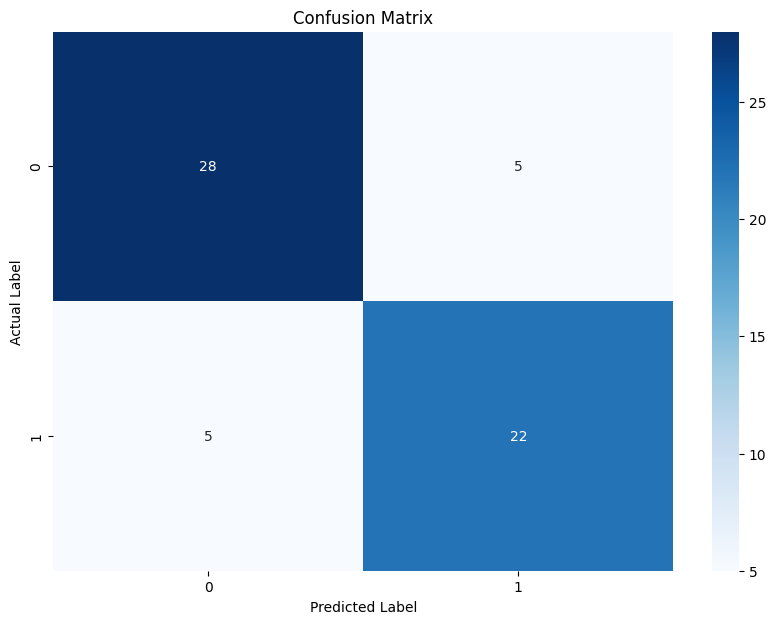

In [12]:
# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

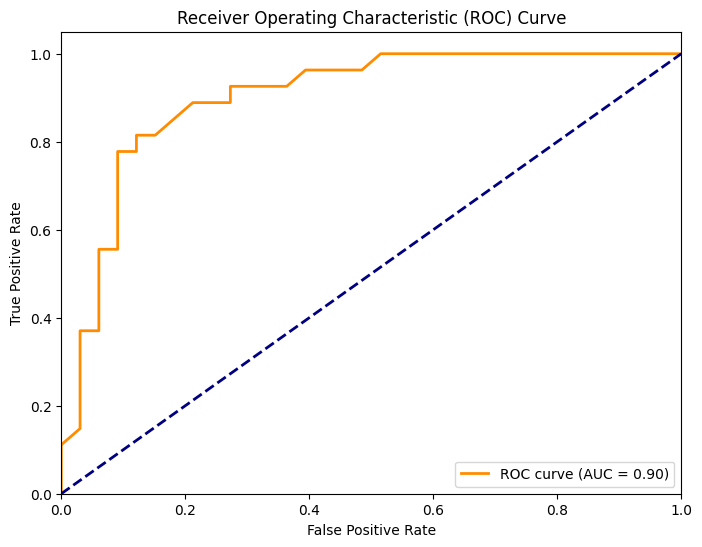

In [13]:
# สร้าง ROC Curve
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
# ปรับแต่ง Parameter ด้วย GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=2),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [15]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.8224290780141844


In [16]:
# ใช้ Model ที่ดีที่สุดจาก GridSearchCV
best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)

print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest Model Classification Report:\n", classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.8333333333333334

Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.81      0.81      0.81        27

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [17]:
# สร้าง Model สุดท้ายโดยใช้ข้อมูลทั้งหมด
final_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=2)
final_rf_classifier.fit(X, y)  # ใช้ X และ y ทั้งหมด ไม่แบ่ง Train/Test

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=2)

In [18]:
import joblib

joblib.dump(best_rf_classifier, 'best_rf_model.joblib')

['best_rf_model.joblib']